In [ ]:
import bluequbit
import matplotlib.pyplot as plt
import numpy as np

# helper function that returns all the nearest neighbors on IBM's 127 qubit heavy hex lattice
from bluequbit.library.helpers.hardware_connectivites import IBM_127_HEAVY_HEX_MAP

# helper function that returns qiskit Pauli objects given the
# qubits idxs for the X,Y, and Z operators in the Pauli string
from bluequbit.library.helpers.pauli_sum import construct_pauli_from_idx_lists
from qiskit import QuantumCircuit

bq = bluequbit.init("<BLUEQUBIT API KEY>")

[BQ-PYTHON-SDK][WARNING] - Beta version 0.15.1b1 of BlueQubit Python SDK is being used.


[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: CKQooZmHfr9KtcSc, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:49:48 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: rXoOhe1wuCc91Eck, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:49:52 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: UGetn74YyZhqgA82, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:49:59 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: QelSPyyR2xmxqmoc, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:50:05 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: fgd0ClnbRBh0yWPs, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:50:12 UTC, estimated runtime: 100 ms, estimated cost

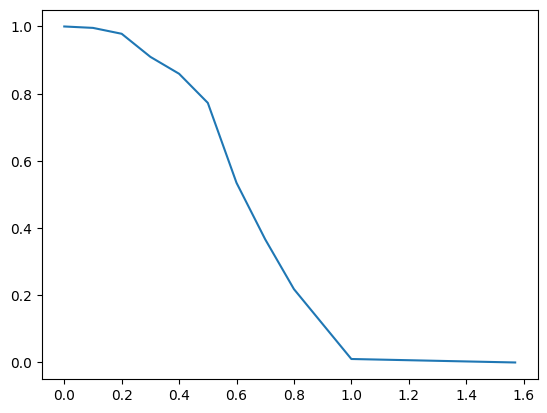

In [2]:
num_qubits = 127
num_trotter_steps = 20

# RECREATING THE IBM EXPERIMENT TO ESTIMATE <Z_62>

# Construct a single weight Pauli operator with a Pauli Z at qubit idx 62
idx_lists = [[], [], [62]]
pauli_op = construct_pauli_from_idx_lists(idx_lists, num_qubits)
pauli_sum = [(pauli_op.to_label(), 1.0)]

rzz_angle = -np.pi / 2
rx_angle_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.5707]

# list to store the expectation value <Z_62> for each choice of the rx_angle
expectation_values = []

# set the Pauli path coefficient threshold
options = {"pauli_path_truncation_threshold": 8e-4}

# construct the circuit for each choice of the rx_angle
for rx_angle in rx_angle_list:
    qc = QuantumCircuit(num_qubits)
    for _ in range(num_trotter_steps):
        for edge in IBM_127_HEAVY_HEX_MAP:
            qc.rzz(rzz_angle, edge[0], edge[1])
        for i in range(num_qubits):
            qc.rx(rx_angle, i)

    # run PPS
    expectation_values.append(
        bq.run(
            qc, device="pauli-path", pauli_sum=pauli_sum, options=options
        ).expectation_value
    )

plt.plot(rx_angle_list, expectation_values)

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: M7K8J0JO9mr77tap, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:54:04 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: TVGtoBs0YBsRLPFW, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:54:11 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: nu03uS9p4Ik9DwFo, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:54:16 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: vp9xr9SlyhpA2IP8, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:54:22 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 127
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: 7u8cwXYCKGFh6CZ5, device: pauli-path, run status: RUNNING, created on: 2025-07-08 19:54:27 UTC, estimated runtime: 100 ms, estimated cost

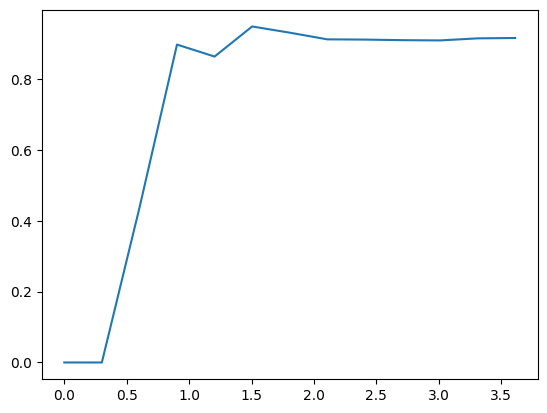

In [5]:
# RECREATING THE CONVERGENCE CURVE FOR θ_X = 0.3

rzz_angle = -np.pi / 2
rx_angle = 0.3

# list of the coefficient thresholds (delta) in decreasing order
deltas = [1 / 2**i for i in range(13)]

# list to store the expectation value <Z_62> for each choice of delta
expectation_values = []

# construct circuit for this pair of rzz and rx angles
qc = QuantumCircuit(num_qubits)
for _ in range(num_trotter_steps):
    for edge in IBM_127_HEAVY_HEX_MAP:
        qc.rzz(rzz_angle, edge[0], edge[1])
    for i in range(num_qubits):
        qc.rx(rx_angle, i)

for delta in deltas:
    # set the Pauli path coefficient threshold
    options = {
        "pauli_path_truncation_threshold": delta,
    }

    # run PPS
    expectation_values.append(
        bq.run(
            qc, device="pauli-path", pauli_sum=pauli_sum, options=options
        ).expectation_value
    )

plt.plot(-np.log10(deltas), expectation_values)